<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Machine_Perception_with_Flowers_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Hello 🙌
In this Notebook, A Classifier is implemented in TensorFlow to classify images of [Flowers dataset](https://www.tensorflow.org/datasets/catalog/tf_flowers) from tensorflow, It contains 3670 images falling into 5 categories:


*   Daisy 💐
*   Roses 🌹
*   Dandelion 🥀
*   SunFlower 🌻
*   Tulip 🌷

you can access it from here:

```gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/```



### Import Neccessary Libraries 🐾

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
print(tf.version.VERSION)

2.9.2


In [5]:
gpu_name = tf.test.gpu_device_name()
print(f'The GPU found at: {gpu_name}')

The GPU found at: 


### Get Data ⚓

In [50]:
path = 'gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/'

!gsutil cat gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv | head -50

gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg,daisy
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/18089878729_907ed2c7cd_m.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/284497199_93a01f48f6.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/3554992110_81d8c9b0bd_m.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/4065883015_4bb6010cb7_n.jpg,daisy
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/roses/7420699022_60fa574524_m.jpg,roses
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/4558536575_d43a611bd4_n.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/7568630428_8cf0fc16ff_n.jpg,daisy
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/7064813645_f7f48fb527.jpg,tulips
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/sunflowers/4933229095

As tou can see, data ""TRAIN_SET"" has a path to each Image and It's type as well.

For Example:

```
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/10712722853_5632165b04.jpg,daisy
```

Has the Format:


```
PATH, Flower_Type
```




### Reading the Images 📖

In [60]:
def Image_read_decoder(filename, reshape_dims=(224, 224)):
  img = tf.io.read_file(filename) #Read the Image as a compressed String.
  img = tf.image.decode_jpeg(img, channels=3) #Decode The Compressed String to a 3-D unit8 Tensor.
  img = tf.image.convert_image_dtype(img, tf.float32) #Normalize the Tensors in to [0, 1] Range
  img = tf.image.resize(img, reshape_dims)
  return img

In [63]:
sample_img = f"{path}dandelion/18089878729_907ed2c7cd_m.jpg"
Image_read_decoder(sample_img, (224, 224))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [1.1648739e-03, 1.1648739e-03, 1.1648739e-03],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[7.0027937e-04, 7.0027937e-04, 7.0027937e-04],
        [2.9074095e-04, 2.9074095e-04, 2.9074095e-04],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [4.3143428e-04, 4.3143428e-04, 4.3143428e-04],
        [0.0000000e+00

In [64]:
all_paths = tf.io.gfile.glob(f'{path}*')
path_names = tf.strings.regex_replace(all_paths, path, "")
class_names = list()
for p in path_names:
  decoded_name = p.numpy().decode('utf-8')
  if decoded_name.find('.') < 0:
    class_names.append(decoded_name)
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### Image Visualization 👀

In [75]:
def show_img(img_path):
  img = Image_read_decoder(img_path)
  plt.imshow(img.numpy())

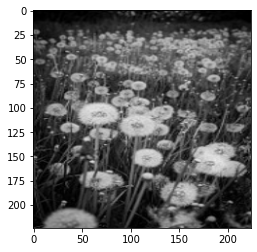

In [76]:
show_img(sample_img)

Did you enjoy it? 🙂 let's Visualize more images 🥳 🥳 🥳

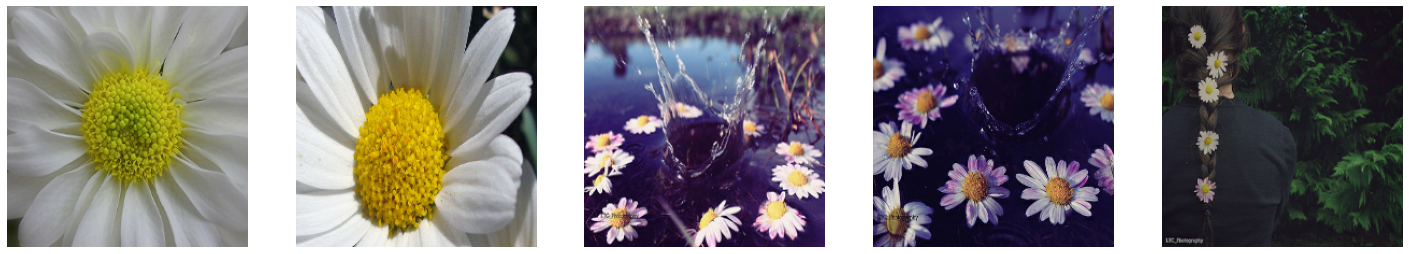

In [129]:
fig, ax = plt.subplots(1, 5, figsize=(25, 25))
files_path = tf.io.gfile.glob(f'{path}{class_names[0]}/*.jpg')[:5]
for ind, img_path in enumerate(files_path):
    img = Image_read_decoder(img_path)
    ax[ind].imshow((img.numpy()))
    ax[ind].axis('off')